In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv('creditcard.csv')

# Basic info
df.info()

# Quick look
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
# Summary statistics
df.describe()

# Check missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class
0    284315
1       492
Name: count, dtype: int64


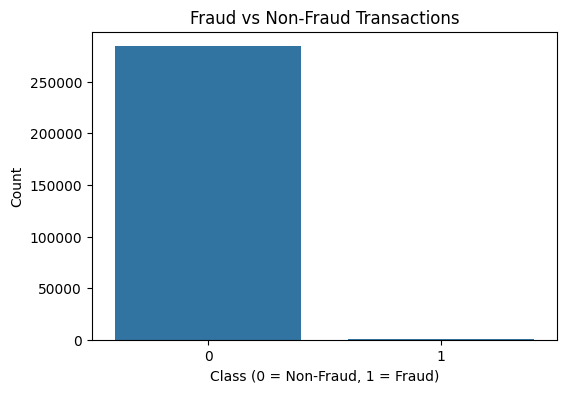

Fraud cases percentage: 0.1730%


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check class balance
class_counts = df['Class'].value_counts()
print(class_counts)

# Plot the distribution
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Fraud vs Non-Fraud Transactions')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

# Percentage of fraud transactions
fraud_percent = (class_counts[1] / class_counts[0]) * 100
print(f"Fraud cases percentage: {fraud_percent:.4f}%")


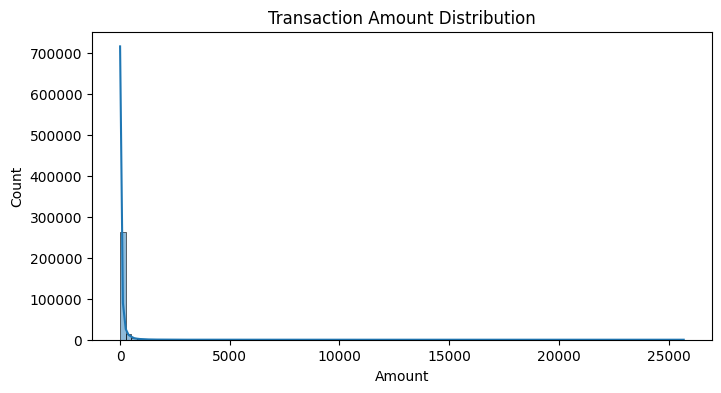

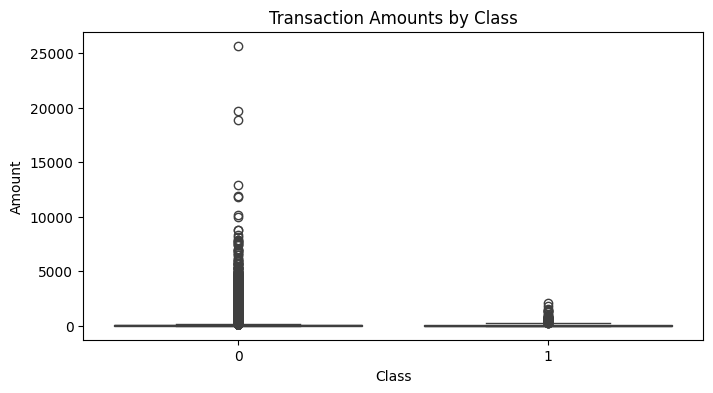

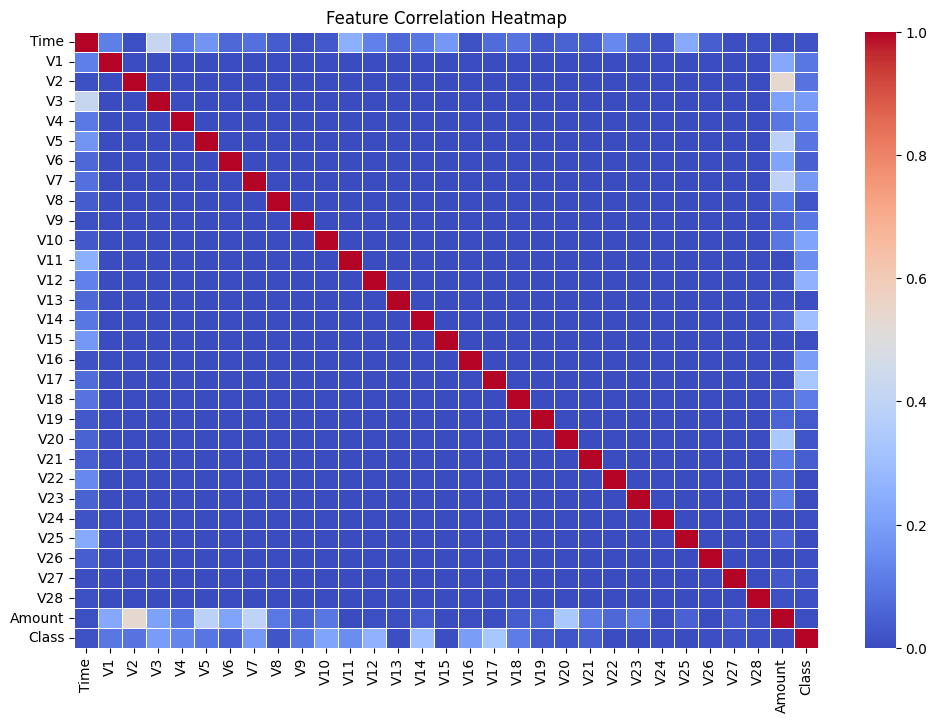

In [8]:
# Transaction amount distribution
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()

# Fraud vs Non-Fraud transaction amounts
plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amounts by Class')
plt.show()

# Correlation matrix (absolute values)
corr = df.corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [9]:
pip install imbalanced-learn



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into train/test sets (stratify to preserve fraud ratio)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Before SMOTE:")
print(y_train.value_counts())

# Scale features (important for models using distance or gradient-based methods)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print("\nAfter SMOTE:")
print(y_train_balanced.value_counts())


Before SMOTE:
Class
0    227451
1       394
Name: count, dtype: int64

After SMOTE:
Class
0    227451
1    227451
Name: count, dtype: int64


Confusion Matrix:
[[55397  1467]
 [    8    90]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9742    0.9869     56864
           1     0.0578    0.9184    0.1088        98

    accuracy                         0.9741     56962
   macro avg     0.5288    0.9463    0.5478     56962
weighted avg     0.9982    0.9741    0.9854     56962


ROC-AUC Score: 0.9708


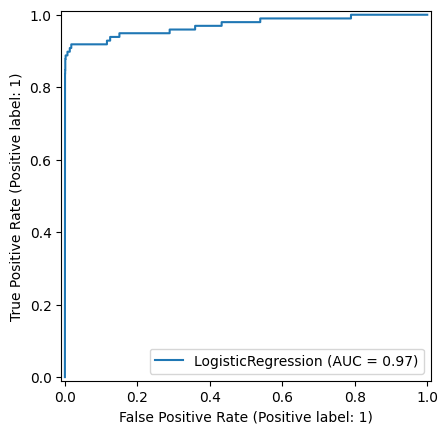

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Train logistic regression model
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_balanced, y_train_balanced)

# Predict on test data
y_pred = log_model.predict(X_test_scaled)
y_proba = log_model.predict_proba(X_test_scaled)[:,1]

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# ROC-AUC score (quality of ranking fraud likelihood)
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot ROC curve
RocCurveDisplay.from_estimator(log_model, X_test_scaled, y_test)


In [12]:
pip install xgboost



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [13]:
#####Train and Compare Multiple Models for Fraud Detection#####

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf_model.fit(X_train_balanced, y_train_balanced)
rf_pred = rf_model.predict(X_test_scaled)
rf_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# XGBoost
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model.fit(X_train_balanced, y_train_balanced)
xgb_pred = xgb_model.predict(X_test_scaled)
xgb_proba = xgb_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate all
print("=== Random Forest ===")
print(classification_report(y_test, rf_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, rf_proba))

print("\n=== XGBoost ===")
print(classification_report(y_test, xgb_pred, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, xgb_proba))


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/xgboost/training.py:199: UserWarning: [17:26:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Random Forest ===
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8710    0.8265    0.8482        98

    accuracy                         0.9995     56962
   macro avg     0.9353    0.9132    0.9240     56962
weighted avg     0.9995    0.9995    0.9995     56962

ROC-AUC: 0.9754216648674099

=== XGBoost ===
              precision    recall  f1-score   support

           0     0.9998    0.9991    0.9994     56864
           1     0.6143    0.8776    0.7227        98

    accuracy                         0.9988     56962
   macro avg     0.8070    0.9383    0.8611     56962
weighted avg     0.9991    0.9988    0.9989     56962

ROC-AUC: 0.9798202729319077


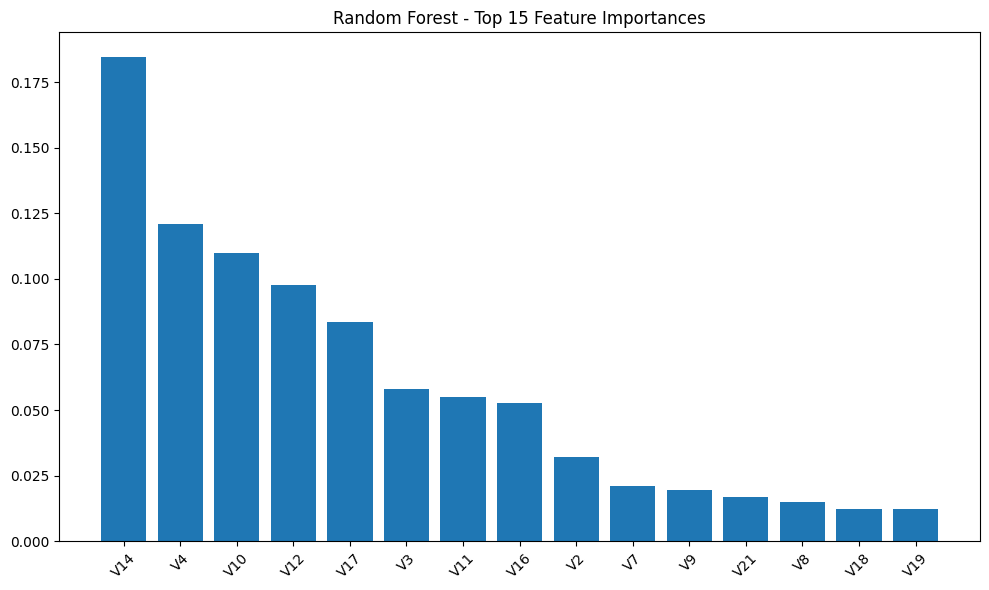

In [ ]:
######Visualize model results######

##Random Forest##
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot top 15
plt.figure(figsize=(10,6))
plt.title("Random Forest - Top 15 Feature Importances")
plt.bar(range(15), importances[indices[:15]], align="center")
plt.xticks(range(15), [features[i] for i in indices[:15]], rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

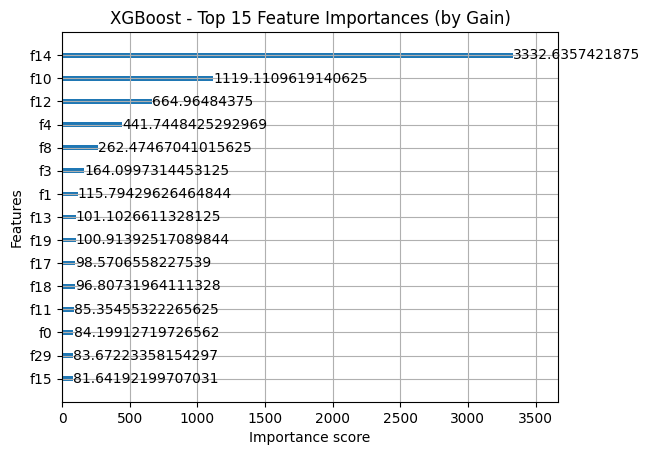

In [15]:
## XG Boost ##
from xgboost import plot_importance

plt.figure(figsize=(10,6))
plot_importance(xgb_model, max_num_features=15, importance_type='gain')
plt.title("XGBoost - Top 15 Feature Importances (by Gain)")
plt.show()


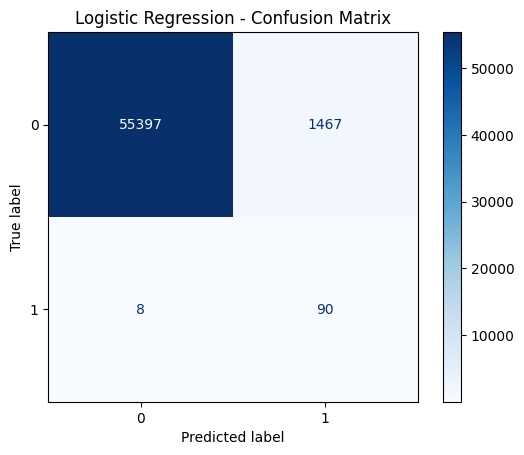

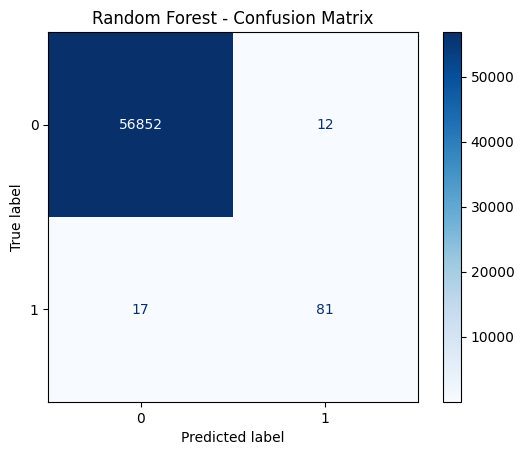

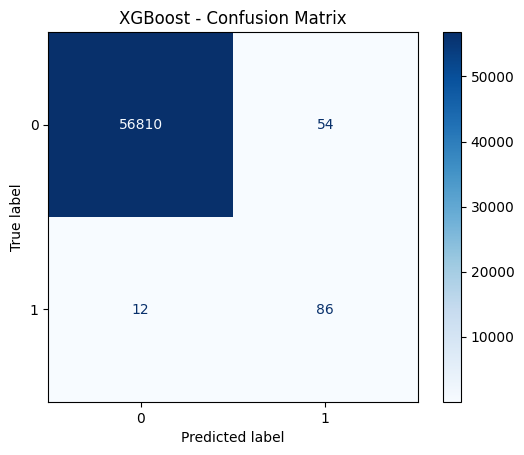

In [16]:
## Confusion Matrixs ##
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

models = {
    "Logistic Regression": (log_model, X_test_scaled),
    "Random Forest": (rf_model, X_test_scaled),
    "XGBoost": (xgb_model, X_test_scaled)
}

for name, (model, Xtest) in models.items():
    y_pred = model.predict(Xtest)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


In [17]:
import pandas as pd
import numpy as np

# Copy to avoid modifying the original
df_viz = df.copy()

# Create amount bins
amount_bins = [0, 10, 50, 100, 500, 1000, 5000, 10000, 25000]
df_viz['Amount_Bin'] = pd.cut(df_viz['Amount'], bins=amount_bins, right=False)

# Convert time (in seconds) to hour of day
df_viz['Hour'] = (df_viz['Time'] / 3600) % 24

# Aggregate summary stats
summary = df_viz.groupby(['Amount_Bin']).agg(
    Transactions=('Class', 'count'),
    Frauds=('Class', 'sum')
).reset_index()
summary['Fraud_Rate_%'] = (summary['Frauds'] / summary['Transactions']) * 100

# Fraud rate by time of day
time_summary = df_viz.groupby(df_viz['Hour'].astype(int)).agg(
    Transactions=('Class', 'count'),
    Frauds=('Class', 'sum')
).reset_index()
time_summary['Fraud_Rate_%'] = (time_summary['Frauds'] / time_summary['Transactions']) * 100

# Save both summaries
summary.to_csv('fraud_by_amount.csv', index=False)
time_summary.to_csv('fraud_by_hour.csv', index=False)

print("✅ Exported:")
print("fraud_by_amount.csv — Fraud rate by transaction amount range")
print("fraud_by_hour.csv — Fraud rate by hour of day")


✅ Exported:
fraud_by_amount.csv — Fraud rate by transaction amount range
fraud_by_hour.csv — Fraud rate by hour of day


/var/folders/17/xwd6vhzx1zs_jcllzmqj7h540000gn/T/ipykernel_78911/201889929.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df_viz.groupby(['Amount_Bin']).agg(
